In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
null_values = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index()
null_values.columns = ['column_name','values']
percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100).reset_index()
percent.columns = ['column_name','percent']
percent_1 = pd.DataFrame(percent.loc[:,'percent'])

null_df = pd.concat([null_values,percent_1],axis = 1)
null_df

,column_name,values,percent
0,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,LoanAmount,22,3.583062
3,Dependents,15,2.442997
4,Loan_Amount_Term,14,2.280130
5,Gender,13,2.117264
6,Married,3,0.488599
7,Loan_Status,0,0.000000
8,Property_Area,0,0.000000
9,CoapplicantIncome,0,0.000000


In [4]:

df_train['Self_Employed'] = df_train['Self_Employed'].fillna(method = 'bfill')
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Dependents'] = df_train['Dependents'].fillna(method = 'bfill')
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [5]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(method = 'bfill')

In [6]:
df_train['Gender'] = df_train['Gender'].fillna(method = 'bfill')
df_train['Married'] = df_train['Married'].fillna(method = 'bfill')

In [7]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df = df_train[features]
normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()


In [8]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1,'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1,'No': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1,'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',60.0:'5 Years',12.0:'1 Year'})

In [9]:
df_train = df_train.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [10]:
df_train['Education'] =df_train['Education'].map({'Graduate':1,'Not Graduate':0}) 

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 62.4+ KB


In [12]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen = pd.get_dummies(df_train['Gender'],drop_first = True)
dep = pd.get_dummies(df_train['Dependents'],drop_first = True)
#ed = pd.get_dummies(df_train['Education'],drop_first = True)
lat = pd.get_dummies(df_train['Loan_Amount_Term'],drop_first = True)
pa = pd.get_dummies(df_train['Property_Area'],drop_first = True)

df_train = pd.concat([df_train,dep,lat,pa],axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df_train = df_train.drop(['Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [15]:
df_train = pd.concat([df_train,normalized_df],axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dep_None             614 non-null uint8
dep_One              614 non-null uint8
dep_Two              614 non-null uint8
10 Years             614 non-null uint8
15 Years             614 non-null uint8
20 Years             614 non-null uint8
25 Years             614 non-null uint8
3 Years              614 non-null uint8
30 Years             614 non-null uint8
40 Years             614 non-null uint8
5 Years              614 non-null uint8
7 Years              614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
ApplicantIncome      614 non-null float64
Coapplican

In [16]:
X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df_train['Loan_Status']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [18]:
log = LogisticRegression()
rfe = RFE(log,23)
rfe1 = rfe.fit(X,y)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
col = X.columns[rfe.support_]
X_train = X[col]

In [20]:
import statsmodels.api as sm
model = sm.GLM(y,sm.add_constant(X_train[col]),family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      591
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -281.22
Date:                Thu, 14 Mar 2019   Deviance:                       562.44
Time:                        13:14:50   Pearson chi2:                     612.
No. Iterations:                    21   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                18.4775   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Gender               -0.0885      0.301     -0.294      0.768      -0.678       0.501
Married               0.5073      0.256      1.979      0.048       0.005       1.010
Education             0.3334      0.262      1.270      0.204      -0.181       0.848
Self_Employed        -0.1901      0.308     -0.618      0.537      -0.793       0.413
Credit_History        3.3859      0.337     10.061      0.000       2.726       4.045
dep_None              0.0734      0.412      0.178      0.858      -0.734       0.881
dep_One              -0.2296      0.454     -0.505      0.613      -1.120       0.661
dep_Two               0.4141      0.468      0.885      0.376      -0.503       1.331
10 Years             -0.5366   5.55e+04  -9.66e-06      1.000   -1.09e+05    1.09e+05
15 Years            -20.8453   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
20 Years            -19.9936   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
25 Years            -20.9564   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
3 Years             -45.2775    5.9e+04     -0.001      0.999   -1.16e+05    1.16e+05
30 Years            -21.1320   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
40 Years            -22.4766   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
5 Years               0.5965   5.89e+04   1.01e-05      1.000   -1.16e+05    1.16e+05
7 Years             -21.5741   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Semiurban             0.9571      0.270      3.549      0.000       0.428       1.486
Urban                 0.1956      0.260      0.752      0.452      -0.314       0.705
ApplicantIncome    4.796e-06   2.38e-05      0.202      0.840   -4.18e-05    5.14e-05
CoapplicantIncome -6.314e-05   3.63e-05     -1.737      0.082      -0.000    8.09e-06
LoanAmount           -0.0015      0.002     -0.906      0.365      -0.005       0.002
=====================================================================================
"""

In [21]:
X1 = df_train.drop(['Loan_ID','Loan_Status','3 Years','5 Years','10 Years','dep_One','dep_Two','20 Years','Education','Gender','Self_Employed','Urban','7 Years','30 Years','15 Years','25 Years','dep_None','LoanAmount','ApplicantIncome','CoapplicantIncome'],axis = 1)
y = df_train['Loan_Status']

In [22]:
log1 = LogisticRegression()
rfe2 = RFE(log1,6)
rfe2 = rfe2.fit(X1,y)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True]
[1 1 1 1]


In [23]:
#CoapplicantIncome

In [24]:
col1 = X1.columns[rfe2.support_]
X_train1 = X1[col1]

In [25]:
model1 = sm.GLM(y,sm.add_constant(X_train1[col1]),family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      609
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -292.00
Date:                Thu, 14 Mar 2019   Deviance:                       584.00
Time:                        13:14:50   Pearson chi2:                     612.
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4935      0.357     -6.985      0.000      -3.193      -1.794
Married            0.4885      0.214      2.286      0.022       0.070       0.907
Credit_History     3.2939      0.326     10.101      0.000       2.655       3.933
40 Years          -1.2636      0.629     -2.010      0.044      -2.496      -0.031
Semiurban          0.7919      0.228      3.475      0.001       0.345       1.239
==================================================================================
"""

In [26]:
### testing on the training set only:

#X_train1 = X_train[col]
X_test1 = X1[col1]
# Predicted probabilities
log21 = LogisticRegression()
log21.fit(X_train1, y)
y_pred = log21.predict_proba(X_test1)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [27]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'status_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Loan_Status','status_Prob'], axis=1)
y_pred_final.head()

,Loan_Status,status_Prob
0,1,0.698376
1,0,0.775787
2,1,0.775787
3,1,0.775787
4,1,0.698376


In [28]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.status_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Loan_Status,status_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.698376,1,1,1,1,1,1,1,0,0,0
1,0,0.775787,1,1,1,1,1,1,1,1,0,0
2,1,0.775787,1,1,1,1,1,1,1,1,0,0
3,1,0.775787,1,1,1,1,1,1,1,1,0,0
4,1,0.698376,1,1,1,1,1,1,1,0,0,0


In [29]:
from sklearn import metrics

In [30]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','false positive rate'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Loan_Status, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fpr = 1-speci
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,fpr]
print(cutoff_df)

     prob  accuracy     sensi     speci  false positive rate
0.0   0.0  0.687296  0.000000  1.000000             0.000000
0.1   0.1  0.693811  0.020833  1.000000             0.000000
0.2   0.2  0.770358  0.302083  0.983412             0.016588
0.3   0.3  0.802932  0.437500  0.969194             0.030806
0.4   0.4  0.802932  0.437500  0.969194             0.030806
0.5   0.5  0.804560  0.453125  0.964455             0.035545
0.6   0.6  0.804560  0.453125  0.964455             0.035545
0.7   0.7  0.737785  0.630208  0.786730             0.213270
0.8   0.8  0.547231  0.869792  0.400474             0.599526
0.9   0.9  0.312704  1.000000  0.000000             1.000000


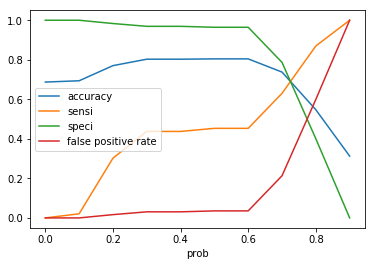

In [31]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','false positive rate'])

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [34]:
y_pred_final['final_predicted'] = y_pred_final.status_Prob.map( lambda x: 1 if x > 0.6 else 0)

(0.0, 1.05)

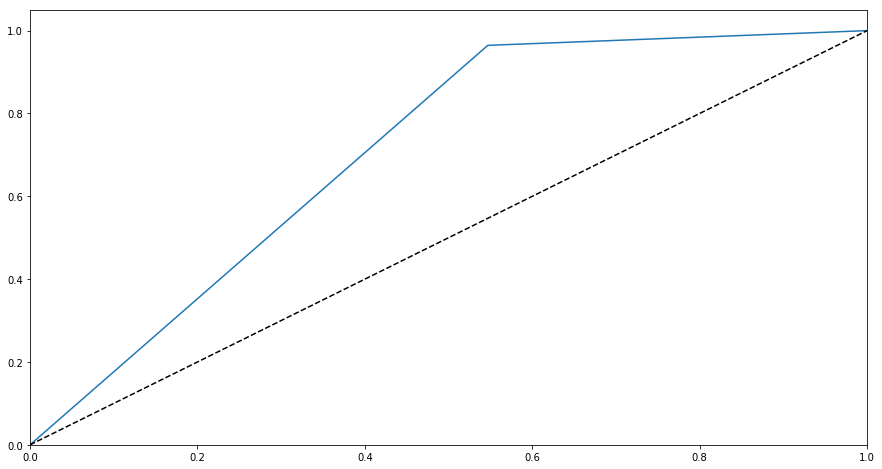

In [35]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Loan_Status, y_pred_final.final_predicted)
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Loan_Status,y_pred_final.final_predicted)
auc_score = metrics.roc_auc_score(y_pred_final.Loan_Status,y_pred_final.final_predicted)
auc_score
plt.figure(figsize=(15, 8))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [36]:
## test data

In [37]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [38]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [39]:

df_test['Credit_History'] = df_test['Credit_History'].fillna(method = 'bfill')
df_test['Gender'] = df_test['Gender'].fillna(method = 'bfill')
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(method = 'bfill')
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Dependents'] = df_test['Dependents'].fillna(method = 'bfill')
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [40]:
## continous variables:
features1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df1 = df_test[features1]
normalized_df1 = normalized_df1 - normalized_df1.mean()/normalized_df1.std()

In [41]:
df_train['Education'] =df_train['Education'].map({'Graduate':1,'Not Graduate':0}) 
df_test['Gender'] = df_test['Gender'].map({'Male': 1,'Female': 0})
df_test['Married'] = df_test['Married'].map({'Yes': 1,'No': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1,'No': 0})
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',350.0:'29 Years',12.0:'1 Year',6.0:'half Year'})

In [42]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen1 = pd.get_dummies(df_test['Gender'],drop_first = True)
#dep1 = pd.get_dummies(df_test['Dependents'],drop_first = True)
#ed1 = pd.get_dummies(df_test['Education'],drop_first = True)
#lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)
pa1 = pd.get_dummies(df_test['Property_Area'],drop_first = True)
lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)

df_test = pd.concat([df_test,pa1,lat1],axis = 1)

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
Loan_ID              367 non-null object
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     366 non-null object
Credit_History       367 non-null float64
Property_Area        367 non-null object
Semiurban            367 non-null uint8
Urban                367 non-null uint8
10 Years             367 non-null uint8
15 Years             367 non-null uint8
20 Years             367 non-null uint8
25 Years             367 non-null uint8
29 Years             367 non-null uint8
3 Years              367 non-null uint8
30 Years             367 non-null uint8
40 Years             367 non-null uint8
7 Year

In [44]:
df_test = df_test.drop(['Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)
df_test = pd.concat([df_test,normalized_df1],axis = 1)

In [45]:
X_test2 = df_test.drop(['Loan_ID','Self_Employed','Gender','Education','Urban','10 Years','15 Years','20 Years','25 Years','29 Years','3 Years','30 Years','7 Years','half Year'],axis = 1)


In [46]:
X_train1.columns

Index(['Married', 'Credit_History', '40 Years', 'Semiurban'], dtype='object')

In [47]:
X_test2 = X_test2[['Married','Credit_History','40 Years','Semiurban']]

y_predicted = log21.predict_proba(X_test2)

In [48]:
# Converting y_pred to a dataframe which is an array
df1 = pd.DataFrame(y_predicted)
# Converting to column dataframe
df1 = df1.iloc[:,[1]]
df1.head()
df1= df1.rename(columns={ 1 : 'test_status_Prob'})
df1['Loan_Status'] = df1.test_status_Prob.map( lambda x: 1 if x > 0.6 else 0)
df2 = pd.DataFrame(df1['Loan_Status'])
loan = pd.DataFrame(df_test['Loan_ID'])

In [49]:
# Removing index for both dataframes to append them side by side 
df2.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,df2],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [50]:
#prediction1 = pd.DataFrame(final, columns= ['Loan_ID','Loan_Status']).to_csv('prediction1.csv')

In [51]:
final["Loan_Status"] = np.where(final.Loan_Status ==1,"Y","N")
final.to_csv('submission1.csv', index = False)